In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score
import math

In [2]:
data = pd.read_csv('DATA/A-train.csv')
data

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,26.52,89.93,-60.46,1137.04,-3.49,NaN,-5.88,-17.13,7.44
1,-68.18,-127.21,23.30,1471.49,16.95,2.30,-11.51,-7.70,7.31
2,-95.05,36.10,-75.27,1158.04,6.97,3.21,-5.86,8.65,-5.77
3,124.40,-8.19,NaN,5527.92,7.36,7.23,10.77,1.92,-0.42
4,-103.25,NaN,-2.89,4865.06,-5.21,-1.54,NaN,4.69,4.31
...,...,...,...,...,...,...,...,...,...
185,34.29,-38.65,-44.41,9775.28,-3.43,4.95,4.60,-11.73,11.78
186,1.62,145.02,53.26,4546.80,11.81,-4.31,4.86,-0.42,3.79
187,29.46,33.91,-20.96,6083819.57,5.10,2.93,1.23,3.23,-3.17
188,-64.93,25.39,-118.74,1746.40,226.26,-1.91,-16.11,-10.44,0.97


In [3]:
column = ['x1','x2','x3','x4','x5','x6','x7','x8','y']
for i in column:
    data[i].fillna(data[i].mean(),inplace=True)

In [4]:
column = ['x1','x2','x3','x4','x5','x6','x7','x8']
for i in column:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    for j in range(len(data)):
        if(data[i][j] < lower_bound ):
            data[i][j] = lower_bound
        elif(data[i][j] > upper_bound ):
            data[i][j] = upper_bound
        inplace=True

In [5]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,26.52,89.930000,-60.460000,1137.04000,-3.49000,1.386444,-5.880000,-17.13,7.44
1,-68.18,-127.210000,23.300000,1471.49000,16.95000,2.300000,-11.510000,-7.70,7.31
2,-95.05,36.100000,-75.270000,1158.04000,6.97000,3.210000,-5.860000,8.65,-5.77
3,124.40,-8.190000,2.463778,5527.92000,7.36000,7.230000,10.770000,1.92,-0.42
4,-103.25,6.777722,-2.890000,4865.06000,-5.21000,-1.540000,-0.243444,4.69,4.31
...,...,...,...,...,...,...,...,...,...
185,34.29,-38.650000,-44.410000,9775.28000,-3.43000,4.950000,4.600000,-11.73,11.78
186,1.62,145.020000,53.260000,4546.80000,11.81000,-4.310000,4.860000,-0.42,3.79
187,29.46,33.910000,-20.960000,38721.94125,5.10000,2.930000,1.230000,3.23,-3.17
188,-64.93,25.390000,-118.740000,1746.40000,24.41875,-1.910000,-16.110000,-10.44,0.97


<AxesSubplot:>

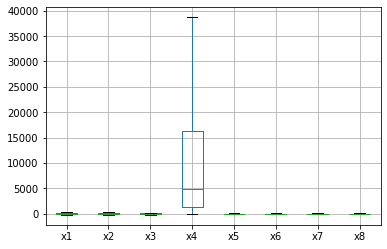

In [6]:
X = data[["x1","x2","x3","x4","x5","x6","x7","x8"]]
Y = data[["y"]]
X.boxplot()

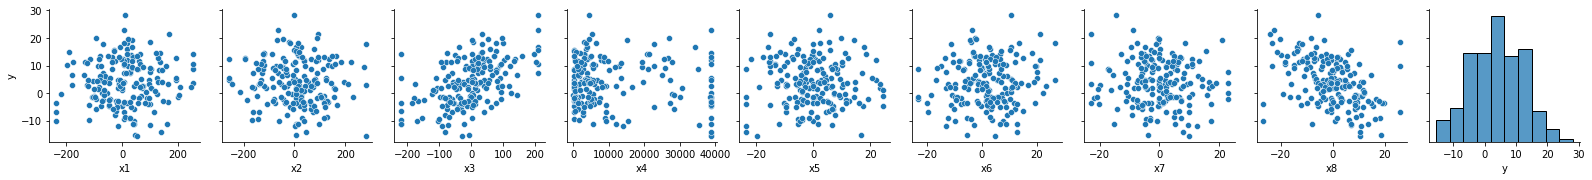

In [7]:
sns.pairplot(data, x_vars=data.columns, y_vars=["y"])

<AxesSubplot:>

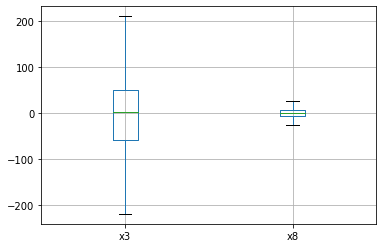

In [8]:
X = data[["x3","x8"]]
Y = data[["y"]]
X.boxplot()

In [9]:
list = []
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y_pred = lm.predict(X_test)
    m = lm.coef_
    c = lm.intercept_
    MSE = np.square(np.subtract(y_test,y_pred)).mean()
    RMSE = math.sqrt(MSE)
    list.append(RMSE)

In [10]:
average = sum(list) / len(list)
print("AVERAGE 500 RMSE =" ,average)

AVERAGE RMSE = 5.925247604999514
